# Dynamic Programming - An easier Reinforcement learning setup

In this notebook, you will write your own implementations of many classical dynamic programming algorithms. 

### A reinforcement learning setup
   
   A reinforcement learning setup has the following components to it. An Agent tries to learn an ultimate goal by moving from one state to another taking actions. A state is a unit in an environment. When agent takes an action to change from one state to another, the environment reacts to it with a reward. The agent does not know how the environment reacts to its actions. Nor does it know how good or bad the reward would be. The Ultimate goal of an agent is to maximize the reward while it achieves its goal. This can be formalised into a [Markovian Decision process](https://en.wikipedia.org/wiki/Markov_decision_process). 
   

A Markovian Decision process (MDP) is defined by

1. a finite set of States - S
2. A finite set of actions - A
3. A finite set of rewards - R
4. The one-step dynamics of the environment determine how the environment decides the state and reward at every time step. The dynamics can be defined by specifying   
p(s 
′
 ,r∣s,a)≐P(S 
t+1
​	 =s 
′
 ,R 
t+1
​	 =r∣S 
t
​	 =s,A 
t
​	 =a) for each possible s', r, s and a

5. the discount rate γ∈[0,1]


An MDP works well and maximizes its reward-to-goal faster if it avoids unnecessary actions when moving from one state to another. So action becomes a function of which state an agent is currently in and which state its heading to. This mapping of what action to take when moving from one state to another is called policy. So as we optimize this policy we can attain our goal as well maximize the agent's reward to maximize the goal. The best policy is called an optimial policy. There can be one or many optimal policies. 

  An agent has to interact with the environment over multiple iterations to first understand the one step dynamics of the envrionment ( in turn the MDP) and then work on finding the optimal policy and thus reach the goal faster. This constitutes the reinforcement learning setup.
  
 

### Dynamic programming setup

In the dynamic programming setting everything is the same as reinforcement learning setup, except the agent has full knowledge of the MDP. (This is much easier than the reinforcement learning setting, where the agent initially knows nothing about how the environment decides state and reward and must learn entirely from interaction how to select actions.)

We will solve a classic MDP ( Exploring Frozen Lake) using Dynamic Programming as an exercise.


Helper functions links:  [plot_utils](https://gist.github.com/karthikBalasubramanian/9cf401a86a85650a4273116381233484), [check_test](https://gist.github.com/karthikBalasubramanian/bf7dc88cbd39b177c2c232bfe3995c5e)

### Part 0: Explore FrozenLakeEnv

Use the code cell below to create an instance of the [FrozenLake](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py) environment.

In [1]:
!pip install -q matplotlib==2.2.2
% matplotlib inline
from frozenlake import FrozenLakeEnv

env = FrozenLakeEnv(is_slippery=True)

Winter is here. You and your friends were tossing around a frisbee at the park
    when you made a wild throw that left the frisbee out in the middle of the lake.
    The water is mostly frozen, but there are a few holes where the ice has melted.
    If you step into one of those holes, you'll fall into the freezing water.
    At this time, there's an international frisbee shortage, so it's absolutely imperative that
    you navigate across the lake and retrieve the disc.
    However, the ice is slippery, so you won't always move in the direction you intend.
    
    The surface is described using a grid like the following
        SFFF
        FHFH
        FFFH
        HFFG
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located
    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.

The agent moves through a $4 \times 4$ gridworld, with states numbered as follows:

```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
```
and the agent has 4 potential actions:
```
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
```

Thus, $\mathcal{S}^+ = \{0, 1, \ldots, 15\}$, and $\mathcal{A} = \{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [2]:
# print the state space and action space
print(env.observation_space)
print(env.action_space)

# print the total number of states and actions
print("there are a total of {0} states and in each state we can take {1} actions".format(env.nS,env.nA))

Discrete(16)
Discrete(4)
there are a total of 16 states and in each state we can take 4 actions


Dynamic programming assumes that the agent has full knowledge of the MDP.  We have already amended the `frozenlake.py` file to make the one-step dynamics accessible to the agent.  

Execute the code cell below to return the one-step dynamics corresponding to a particular state and action.  In particular, `env.P[1][0]` returns the the probability of each possible reward and next state, if the agent is in state 1 of the gridworld and decides to go left.

In [3]:
print(" from state 1 if we take an action to go 'left' there is a chance that it can go in all possible ways")
print(" What we see here is the one-step-dynamics response. I.E the environment's response to agent's action")
env.P[1][0]

 from state 1 if we take an action to go 'left' there is a chance that it can go in all possible ways
 What we see here is the one-step-dynamics response. I.E the environment's response to agent's action


[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]

In [4]:
import numpy as np
random_policy = np.ones([env.nS, env.nA]) / env.nA

random_policy

array([[ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25]])

A random policy is a uniform stochastic policy where there is no proper state action mapping like the deterministic policy. Hence, we give uniformly likely chance for the agent to take from a state s.

Each entry takes the form 
```
prob, next_state, reward, done
```
where: 
- `prob` details the conditional probability of the corresponding (`next_state`, `reward`) pair, and
- `done` is `True` if the `next_state` is a terminal state, and otherwise `False`.

Thus, we can interpret `env.P[1][0]` as follows:
$$
\mathbb{P}(S_{t+1}=s',R_{t+1}=r|S_t=1,A_t=0) = \begin{cases}
               \frac{1}{3} \text{ if } s'=1, r=0\\
               \frac{1}{3} \text{ if } s'=0, r=0\\
               \frac{1}{3} \text{ if } s'=5, r=0\\
               0 \text{ else}
            \end{cases}
$$

To understand the value of `env.P[1][0]`, note that when you create a FrozenLake environment, it takes as an (optional) argument `is_slippery`, which defaults to `True`.  

To see this, change the first line in the notebook from `env = FrozenLakeEnv()` to `env = FrozenLakeEnv(is_slippery=False)`.  Then, when you check `env.P[1][0]`, it should look like what you expect (i.e., `env.P[1][0] = [(1.0, 0, 0.0, False)]`).

The default value for the `is_slippery` argument is `True`, and so `env = FrozenLakeEnv()` is equivalent to `env = FrozenLakeEnv(is_slippery=True)`.  In the event that `is_slippery=True`, you see that this can result in the agent moving in a direction that it did not intend (where the idea is that the ground is *slippery*, and so the agent can slide to a location other than the one it wanted).

Feel free to change the code cell above to explore how the environment behaves in response to other (state, action) pairs.  

Before proceeding to the next part, make sure that you set `is_slippery=True`, so that your implementations below will work with the slippery environment!

### Part 1: Iterative Policy Evaluation

In this section, you will write your own implementation of iterative policy evaluation.

Your algorithm should accept four arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the estimate has sufficiently converged to the true value function (default value: `1e-8`).

The algorithm returns as **output**:
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s` under the input policy.

Please complete the function in the code cell below.

![Iterative policy evaluation](policy-eval.png)

In [5]:

action_dict = {0: "left", 1: "down", 2: "right", 3: "up"}
def policy_evaluation(env, policy, gamma=1, theta=1e-8, silent=False):
    # initializing State value function for all states arbitrarily.
    V = np.zeros(env.nS)
    counter = 0
    while True:
        delta = 0
        
        for state_idx, each_state in enumerate(V):
            present_state_value = 0
            # cumulative environment's reaction to all the action from a state s is called state value function.
            for action_idx, action_prob in enumerate(policy[state_idx]):
                for prob, next_state, reward, done in env.P[state_idx][action_idx]:
                    present_state_value += action_prob * prob * (reward + (gamma* V[next_state]))
            
            delta = max(delta, abs(present_state_value-V[state_idx]))
            if not silent:
                print("delta value is {0} when updating state {1}".format(delta, state_idx))
            V[state_idx] = present_state_value
            if not silent:
                print("state value function of state {0} is {1} at iteration {2}".format(state_idx, V[state_idx], counter))
        if delta < theta:
            break
        counter += 1
        if not silent:
            print("counter value is changed to {0}".format(counter))
    
    ## TODO: complete the function
    
    return V

We will evaluate the equiprobable random policy $\pi$, where $\pi(a|s) = \frac{1}{|\mathcal{A}(s)|}$ for all $s\in\mathcal{S}$ and $a\in\mathcal{A}(s)$.  

Use the code cell below to specify this policy in the variable `random_policy`.

In [6]:
random_policy = np.ones([env.nS, env.nA]) / env.nA

Run the next code cell to evaluate the equiprobable random policy and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.

you can find plot_values function gist [here](https://gist.github.com/karthikBalasubramanian/9cf401a86a85650a4273116381233484) 

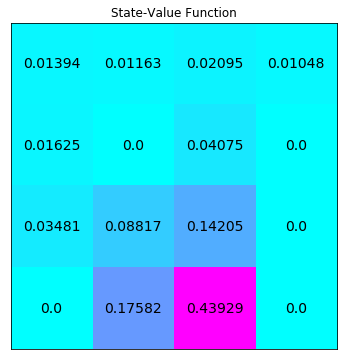

In [7]:
from plot_utils import plot_values

# evaluate the policy 
V = policy_evaluation(env, random_policy, silent=True)

plot_values(V)

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that your `policy_evaluation` function satisfies the requirements outlined above (with four inputs, a single output, and with the default values of the input arguments unchanged). You can find check test gist [here](https://gist.github.com/karthikBalasubramanian/bf7dc88cbd39b177c2c232bfe3995c5e)

In [8]:
import check_test

check_test.run_check('policy_evaluation_check', policy_evaluation)

delta value is 0 when updating state 0
state value function of state 0 is 0.0 at iteration 0
delta value is 0 when updating state 1
state value function of state 1 is 0.0 at iteration 0
delta value is 0 when updating state 2
state value function of state 2 is 0.0 at iteration 0
delta value is 0 when updating state 3
state value function of state 3 is 0.0 at iteration 0
delta value is 0 when updating state 4
state value function of state 4 is 0.0 at iteration 0
delta value is 0 when updating state 5
state value function of state 5 is 0.0 at iteration 0
delta value is 0 when updating state 6
state value function of state 6 is 0.0 at iteration 0
delta value is 0 when updating state 7
state value function of state 7 is 0.0 at iteration 0
delta value is 0 when updating state 8
state value function of state 8 is 0.0 at iteration 0
delta value is 0 when updating state 9
state value function of state 9 is 0.0 at iteration 0
delta value is 0 when updating state 10
state value function of state 

**<span style="color: green;">PASSED</span>**

### Part 2: Obtain $q_\pi$ from $v_\pi$

In this section, you will write a function that takes the state-value function estimate as input, along with some state $s\in\mathcal{S}$.  It returns the **row in the action-value function** corresponding to the input state $s\in\mathcal{S}$.  That is, your function should accept as input both $v_\pi$ and $s$, and return $q_\pi(s,a)$ for all $a\in\mathcal{A}(s)$.

Your algorithm should accept four arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `s`: This is an integer corresponding to a state in the environment.  It should be a value between `0` and `(env.nS)-1`, inclusive.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `q`: This is a 1D numpy array with `q.shape[0]` equal to the number of actions (`env.nA`).  `q[a]` contains the (estimated) value of state `s` and action `a`.

Please complete the function in the code cell below.

![Action Value Function Evaluation](est-action.png)

In [9]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    for action_idx, value in enumerate(q):
        for prob, next_state,reward, done in env.P[s][action_idx]:
            q[action_idx] += prob * (reward + (gamma * V[next_state])) 
    
    ## TODO: complete the function
    
    return q

Run the code cell below to print the action-value function corresponding to the above state-value function.

In [10]:
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print("Action-Value Function:")
print(Q)

Action-Value Function:
[[ 0.0147094   0.01393978  0.01393978  0.01317015]
 [ 0.00852356  0.01163091  0.0108613   0.01550788]
 [ 0.02444514  0.02095298  0.02406033  0.01435346]
 [ 0.01047649  0.01047649  0.00698432  0.01396865]
 [ 0.02166487  0.01701828  0.01624865  0.01006281]
 [ 0.          0.          0.          0.        ]
 [ 0.05433538  0.04735105  0.05433538  0.00698432]
 [ 0.          0.          0.          0.        ]
 [ 0.01701828  0.04099204  0.03480619  0.04640826]
 [ 0.07020885  0.11755991  0.10595784  0.05895312]
 [ 0.18940421  0.17582037  0.16001424  0.04297382]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.08799677  0.20503718  0.23442716  0.17582037]
 [ 0.25238823  0.53837051  0.52711478  0.43929118]
 [ 0.          0.          0.          0.        ]]


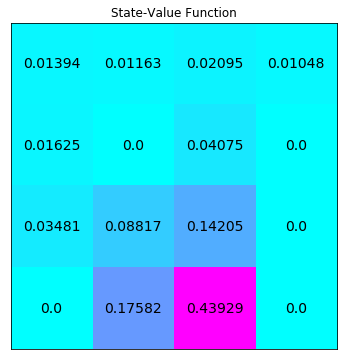

In [11]:
# checking with state value 
V = policy_evaluation(env, random_policy, silent=True)
plot_values(V)

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `q_from_v` function satisfies the requirements outlined above (with four inputs, a single output, and with the default values of the input arguments unchanged).

In [12]:
check_test.run_check('q_from_v_check', q_from_v)

**<span style="color: green;">PASSED</span>**

### Part 3: Policy Improvement

In this section, you will write your own implementation of policy improvement. 

Your algorithm should accept three arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.

Please complete the function in the code cell below.  You are encouraged to use the `q_from_v` function you implemented above.

![Policy Improvement Algo](improve.png)

In [13]:
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    
    ## TODO: complete the function
    for each_state in range(env.nS):
        action_value_array = q_from_v(env, V, each_state)
        policy[each_state][np.argmax(action_value_array)] = 1 
        

    return policy

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `policy_improvement` function satisfies the requirements outlined above (with three inputs, a single output, and with the default values of the input arguments unchanged).

Before moving on to the next part of the notebook, you are strongly encouraged to check out the solution in **Dynamic_Programming_Solution.ipynb**.  There are many correct ways to approach this function!

In [14]:
check_test.run_check('policy_improvement_check', policy_improvement)

**<span style="color: green;">PASSED</span>**

In [15]:
print(policy_improvement(env, V))

[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]]


### Part 4: Policy Iteration

In this section, you will write your own implementation of policy iteration.  The algorithm returns the optimal policy, along with its corresponding state-value function.

Your algorithm should accept three arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the policy evaluation step has sufficiently converged to the true value function (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

Please complete the function in the code cell below.  You are strongly encouraged to use the `policy_evaluation` and `policy_improvement` functions you implemented above.

![Policy Iteration Algo](iteration.png)

In [16]:
import copy
def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    policy_state=False
    ## TODO: complete the function
    while not policy_state:
        V = policy_evaluation(env, policy, silent=True)
        policy_prime = policy_improvement(env,V)
        if(policy==policy_prime).all():
            policy_state=True
        policy= copy.copy(policy_prime)

    return policy, V

Run the next code cell to solve the MDP and visualize the output.  The optimal state-value function has been reshaped to match the shape of the gridworld.

**Compare the optimal state-value function to the state-value function from Part 1 of this notebook**.  _Is the optimal state-value function consistently greater than or equal to the state-value function for the equiprobable random policy?_


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]] 



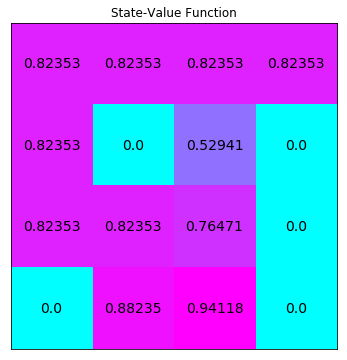

In [17]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values(V_pi)

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `policy_iteration` function satisfies the requirements outlined above (with three inputs, two outputs, and with the default values of the input arguments unchanged).

In [18]:
check_test.run_check('policy_iteration_check', policy_iteration)

**<span style="color: green;">PASSED</span>**

### Part 5: Truncated Policy Iteration

In this section, you will write your own implementation of truncated policy iteration.  

You will begin by implementing truncated policy evaluation.  Your algorithm should accept five arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `max_it`: This is a positive integer that corresponds to the number of sweeps through the state space (default value: `1`).
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

Please complete the function in the code cell below.

![Truncated Policy Evaluation](truncated-eval.png)

In [19]:
def truncated_policy_evaluation(env, policy, V, max_it=1, gamma=1):
    
    ## TODO: complete the function
    counter=0
    while counter < max_it:
        for state_idx,each_state in enumerate(V):
            v = 0
            #get action value func array
            q = q_from_v(env, V, state_idx)
            for action_idx, action_prob in enumerate(policy[state_idx]):
                # state value function is action prob from policy and 
                # action value function that is just calculated
                # before.
                v += action_prob * q[action_idx]
            
            V[state_idx] = v
        counter +=1
    return V

Next, you will implement truncated policy iteration.  Your algorithm should accept five arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `max_it`: This is a positive integer that corresponds to the number of sweeps through the state space (default value: `1`).
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used for the stopping criterion (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

Please complete the function in the code cell below.

![Truncated Policy Iteration](truncated-iter.png)

In [20]:
def truncated_policy_iteration(env, max_it=1, gamma=1, theta=1e-8):
    # initializing equiprobable random policy and a default state function
    V = np.zeros(env.nS)
    policy = np.zeros([env.nS, env.nA]) / env.nA
    
    ## TODO: complete the function
    
    while True:
        policy = policy_improvement(env, V)
        V_old =  copy.copy(V)
        V = truncated_policy_evaluation(env, policy, V, max_it, gamma)
        
        if max(abs(V-V_old)) < theta:
            break
        
        
    
    return policy, V

Run the next code cell to solve the MDP and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.

Play with the value of the `max_it` argument.  Do you always end with the optimal state-value function?


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]] 



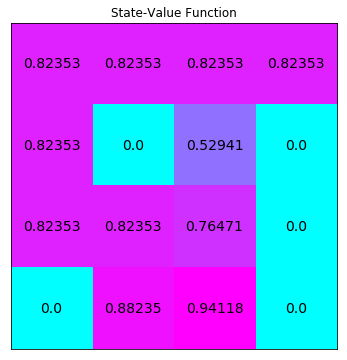

In [21]:
policy_tpi, V_tpi = truncated_policy_iteration(env, max_it=2)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_tpi,"\n")

# plot the optimal state-value function
plot_values(V_tpi)

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `truncated_policy_iteration` function satisfies the requirements outlined above (with four inputs, two outputs, and with the default values of the input arguments unchanged).

In [22]:
check_test.run_check('truncated_policy_iteration_check', truncated_policy_iteration)

**<span style="color: green;">PASSED</span>**

### Part 6: Value Iteration

In this section, you will write your own implementation of value iteration.

Your algorithm should accept three arguments as input:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used for the stopping criterion (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

![Value Iteration](value-iteration.png)

In [23]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    
    while True:
        delta = 0
        for state_idx, each_state in enumerate(V):
            v = V[state_idx]
            V[state_idx] = max(q_from_v(env,V,state_idx))
            delta = max(delta , abs(v- V[state_idx]))
        
        if delta < theta:
            break
    policy = policy_improvement(env, V)
            
    ## TODO: complete the function
    
    return policy, V

Use the next code cell to solve the MDP and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]] 



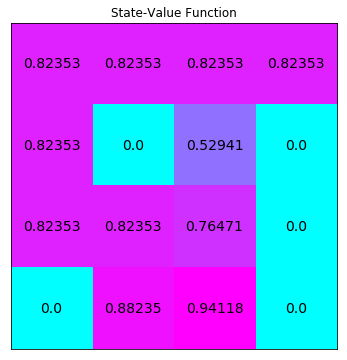

In [24]:
policy_vi, V_vi = value_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

# plot the optimal state-value function
plot_values(V_vi)

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `value_iteration` function satisfies the requirements outlined above (with three inputs, two outputs, and with the default values of the input arguments unchanged).

In [25]:
check_test.run_check('value_iteration_check', value_iteration)

**<span style="color: green;">PASSED</span>**